In [1]:
import pickle
from pathlib import Path
import json


In [16]:
with open('egonlq/results/completed/00a21a4a-50cb-46d8-a8c0-bc637a4d747e.pkl', 'rb') as f:
    data = pickle.load(f)
data[:2]  # frame annotations


[[[[0.5416566133499146,
    0.46158358454704285,
    0.05734366178512573,
    0.08274935185909271],
   [0.5119495391845703,
    0.678068995475769,
    0.27147987484931946,
    0.25331538915634155],
   [0.5417394638061523,
    0.46181896328926086,
    0.05594884976744652,
    0.08140957355499268],
   [0.30076396465301514,
    0.5647745132446289,
    0.12326391041278839,
    0.15682300925254822],
   [0.5550534129142761,
    0.7422058582305908,
    0.07498987019062042,
    0.22036968171596527],
   [0.5555694699287415,
    0.7422721982002258,
    0.07151882350444794,
    0.21760377287864685]],
  [0.4971545934677124,
   0.4266586899757385,
   0.486345499753952,
   0.3699459731578827,
   0.4154777228832245,
   0.4383965730667114],
  ['pieces', 'chop rack', 'chopsticks', 'bowl', 'pieces', 'chopsticks']],
 [[[0.512168288230896,
    0.6750730276107788,
    0.27364611625671387,
    0.25267294049263],
   [0.54475337266922,
    0.45811161398887634,
    0.054933663457632065,
    0.08271370828151703

# clip 기반 json 파일 만들기 $\Rightarrow$ 아 이거 필요 없슴

In [15]:
# clip_uid

# video_uid
# annotations
# 	query
# 	slot_x if not null

for p_json in Path('jsons/').glob('*.json'):
    if 'clips' in str(p_json):
        continue
    print(str(p_json))

    data = json.load(p_json.open())
    new_data: dict[str, list[dict]] = {'clips': []}
    for video in data['videos']:
        video_uid = video['video_uid']
        for clip in video['clips']:
            clip_uid = clip['clip_uid']
            clip_s = clip['video_start_sec']
            new_annotations: list[dict] = []
            for annotation in clip['annotations']:
                for language_query in annotation['language_queries']:
                    if 'query' not in language_query:  # bad annotation
                        print(f'{video_uid} | {clip_uid} | No query | {language_query}')
                        continue
                    fs,  fe  = language_query['video_start_frame'], language_query['video_end_frame']
                    ts1, te1 = language_query['clip_start_sec'], language_query['clip_end_sec']  # for double-check
                    ts2, te2 = language_query['video_start_sec'], language_query['video_end_sec']  # for double-check
                    fl = fe - fs + 1
                    if (diff := abs( (te1 - ts1) - (te2 - ts2) )) > 1e-2:
                        msg = f'{video_uid} | {clip_uid} | Different annotation lengths | {fl/30:7.3f} | {te1-ts1:7.3f} vs. {te2-ts2:7.3f} | {diff:7.3f} s | {language_query}'
                        print(msg)
                    new_annotations.append(language_query)
            new_data['clips'].append({
                'clip_uid': clip_uid,
                'video_uid': video_uid,
                'annotations': new_annotations,
            })
    with p_json.with_name(p_json.stem + '_clips.json').open('w') as f:
        json.dump(new_data, f)
    print(len(new_data['clips']))
    print()


jsons/nlq_train.json
2991a3c3-ce12-4fdf-806c-a4c5608c4624 | da111cf5-53f6-4af0-8cb5-fc554bb80ea8 | No query | {'clip_start_sec': 252.07942, 'clip_end_sec': 254.79394, 'video_start_sec': 252.1004486, 'video_end_sec': 254.8149686, 'video_start_frame': 7562, 'video_end_frame': 7644, 'raw_tags': []}
1652a22c-c350-4c2c-9e4c-71e055d1a268 | c636d0f8-7009-433f-8bb1-645e03b2fe1a | Different annotation lengths |   2.633 |   2.637 vs.   2.613 |   0.024 s | {'clip_start_sec': 377.18664, 'clip_end_sec': 379.824, 'video_start_sec': 467.20766860000003, 'video_end_sec': 469.82102860000003, 'video_start_frame': 14016, 'video_end_frame': 14094, 'template': 'Objects: State of an object', 'query': 'Did I leave the microwave open?', 'slot_x': 'open', 'verb_x': 'open', 'raw_tags': ['Objects: State of an object', 'Did I leave the microwave open?', 'open', 'open']}
a5d525a9-27a5-4a68-9f5f-f0be5d989b92 | 44c107c5-c80d-41ef-a469-3ef7edb309c5 | Different annotation lengths |   0.633 |   1.066 vs.   0.609 |   0.4

# json 수정하기 $\Rightarrow$ 이것도 필요 없음 굳이 json 안에 이걸 쑤셔넣어야 하나?\
# When is your class? 

```json
{
    "version": "2.0",
    "date": "230106",
    "description": "NLQ Annotations (train)",
    "metadata": "s3://ego4d-consortium-sharing/public/v2/ego4d.json",
    "videos": [
        {
            "video_uid": "216e3f0e-ccb9-4d54-ba56-d275fedbf52f",
            "clips": [
                {
                    "clip_uid": "f06d1935-550f-4caa-909c-b2db4c28f599",
                    "video_start_sec": 0.0210286,
                    "video_end_sec": 480.0210286,
                    "video_start_frame": 0,
                    "video_end_frame": 14400,
                    "clip_start_sec": 0,
                    "clip_end_sec": 480.0,
                    "clip_start_frame": 0,
                    "clip_end_frame": 14400,
                    "source_clip_uid": "2cdc7965-9007-48d3-b6d1-d589179f1670",
                    "annotations": [
                        {
                            "language_queries": [
                                {
                                    "clip_start_sec": 17.25669,
                                    "clip_end_sec": 27.256,
                                    "video_start_sec": 17.2777186,
                                    "video_end_sec": 27.2770286,
                                    "video_start_frame": 518,
                                    "video_end_frame": 818,
                                    "template": "Objects: What did I put in X?",
                                    "query": "what did I pick from the fridge?",
                                    "slot_x": "fridge",
                                    // 여기에 이거 추가
                                    "detections": {
                                        "object_name": "fridge",  // slot_x
                                        "bboxes": [[0.5416566133499146, 0.46158358454704285, 0.05734366178512573, 0.08274935185909271], ...],
                                        "scores": [0.4971545934677124, ...]
                                    },
                                    "verb_x": "pick",
                                    "raw_tags": [
                                        "Objects: What did I put in X?",
                                        "what did I pick from the fridge?",
                                        "fridge",
                                        "pick"
                                    ]
                                },
                                ...
                            ],
                            "annotation_uid": "2a6effcd-b178-4c79-acda-3b8546da7542"
                        },
                        ...
                    ],
                    ...
                }
            ],
            "split": "train"
        },
        ...
    ]
}
```

In [1]:
import pickle
from pathlib import Path
import json
from collections import defaultdict
from pprint import pformat, pprint

polish = lambda s: s.strip().lower()

def get_obj2clip_dets(clip_uid: str):
    p_det_dir = Path('egonlq/results/completed')
    p_clip_det = p_det_dir / f'{clip_uid}.pkl'
    if not p_clip_det.exists():
        return None
    clip_det_data: list = pickle.load(p_clip_det.open('rb'))
    all_clip_objs: set[str] = set(sum([frame_objs for _, _, frame_objs in clip_det_data], []))
    obj2clip_dets: dict[str, dict[str, list[list[float]] | list[float] ]] = \
        defaultdict(lambda : {'bboxes': [], 'scores': []})
    for frame_idx, frame_bboxes in enumerate(clip_det_data):
        frame_objs = set() #set(frame_bboxes[2])
        for bbox, score, obj in zip(*frame_bboxes):
            if frame_idx != 0:
                assert obj in obj2clip_dets.keys()
            # TODO: multiple object 관리 안 함
            if obj in frame_objs:  # if multiple objects are detected in a frame
                if score > obj2clip_dets[obj]['scores'][-1]:  # replace with one with larger score
                    obj2clip_dets[obj]['bboxes'][-1] = bbox
                    obj2clip_dets[obj]['scores'][-1] = score
            else:
                obj2clip_dets[obj]['bboxes'].append(bbox)
                obj2clip_dets[obj]['scores'].append(score)
            frame_objs |= {obj}
        for undet_obj in all_clip_objs - frame_objs:
            obj2clip_dets[undet_obj]['bboxes'].append(None)
            obj2clip_dets[undet_obj]['scores'].append(None)
        for obj, det in obj2clip_dets.items():
            if len(det['bboxes']) != frame_idx + 1:
                pprint(clip_det_data[frame_idx])
                print(frame_objs)
            assert len(det['bboxes']) == frame_idx + 1, f"{clip_uid} {obj} {frame_idx} {len(det['bboxes'])} {pformat(det, width=100, compact=True)}"
            assert len(det['scores']) == frame_idx + 1, f"{clip_uid} {obj} {frame_idx} {len(det['scores'])} {pformat(det, width=100, compact=True)}"
    return obj2clip_dets

p_json = Path('jsons/nlq_train.json')
data = json.load(p_json.open())
for video in data['videos']:
    video_uid = video['video_uid']
    for clip in video['clips']:
        clip_uid = clip['clip_uid']
        obj2clip_dets = get_obj2clip_dets(clip_uid)  # {obj1: {'bboxes': [bbox t=0, bbox t=1, ...], 'scores': [score t=0, ...]}, obj2: ...}
        if obj2clip_dets is None:
            print(f'{video_uid} | {clip_uid} | Not exist')  # maybe not processed or v2
            continue
        for annotation in clip['annotations']:
            for language_query in annotation['language_queries']:
                if 'query' not in language_query:  # bad annotation: no query
                    print(f'{video_uid} | {clip_uid} | No query  | {language_query}')
                    continue
                if (slot_x := language_query.get('slot_x', None)) is None:  # bad annotation: no slot_x
                    print(f'{video_uid} | {clip_uid} | No slot_x | {language_query}')
                    continue
                language_query['detections'] = {
                    'object_name': slot_x,
                    'bboxes': obj2clip_dets[slot_x]['bboxes'],
                    'scores': obj2clip_dets[slot_x]['scores']
                }

json.dump(p_json.with_name(p_json.stem + '_with_bboxes.json').open())
data['videos'][0]['clips'][0]['annotations'][0]['language_queries'][0]

8a933a23-55ff-42f2-8f86-c7746b2e09ac | 5a347110-21e3-47eb-83f8-6e60d07c1b77 | Not exist
9d09f4f8-4ea1-4989-8f6d-8965c4f4fe69 | 04199001-307a-40fd-b20c-4b4128546b89 | Not exist
ff1f1ba3-ec19-4947-8632-1f7778e7a115 | c0c24027-ee4e-4c79-86cb-cc96879da63d | Not exist
557b69b3-71f2-4e25-9868-dc68b07dcd1f | 19787ac8-3172-428f-8598-f06f84e188b8 | No slot_x | {'clip_start_sec': 54.80807, 'clip_end_sec': 98.0, 'video_start_sec': 864.8101012, 'video_end_sec': 908.0020312, 'video_start_frame': 25943, 'video_end_frame': 27239, 'template': 'Objects: What did I put in X?', 'query': 'What did I put in the blue bag?', 'slot_x': None, 'verb_x': 'put', 'raw_tags': ['Objects: What did I put in X?', 'What did I put in the blue bag?', None, 'put']}
557b69b3-71f2-4e25-9868-dc68b07dcd1f | 19787ac8-3172-428f-8598-f06f84e188b8 | No slot_x | {'clip_start_sec': 111.84526, 'clip_end_sec': 167.0, 'video_start_sec': 921.8472912, 'video_end_sec': 977.0020312, 'video_start_frame': 27654, 'video_end_frame': 29309, 'te

{'clip_start_sec': 17.25669,
 'clip_end_sec': 27.256,
 'video_start_sec': 17.2777186,
 'video_end_sec': 27.2770286,
 'video_start_frame': 518,
 'video_end_frame': 818,
 'template': 'Objects: What did I put in X?',
 'query': 'what did I pick from the fridge?',
 'slot_x': 'fridge',
 'verb_x': 'pick',
 'raw_tags': ['Objects: What did I put in X?',
  'what did I pick from the fridge?',
  'fridge',
  'pick'],
 'detections': {'object_name': 'fridge', 'bboxes': [], 'scores': []}}

In [2]:
json.dump(p_json.with_name(p_json.stem + '_with_bboxes.json').open())

FileNotFoundError: [Errno 2] No such file or directory: 'jsons/nlq_train_with_bboxes.json'

In [2]:
import pickle
from decord import VideoReader, cpu
from pathlib import Path
import pandas as pd

def cwh2xyxy(cx, cy, w, h, img_height, img_width):
    x1 = round((cx - w / 2) * img_width)
    y1 = round((cy - h / 2) * img_height)
    x2 = round((cx + w / 2) * img_width)
    y2 = round((cy + h / 2) * img_height)
    return x1, y1, x2, y2

p_csv = Path('csvs/nlq_train.csv')
df = pd.read_csv(p_csv)
row = df.iloc[0]
clip_uid = row['clip_uid']
slot_x =

video_uid              216e3f0e-ccb9-4d54-ba56-d275fedbf52f
clip_uid               f06d1935-550f-4caa-909c-b2db4c28f599
video_start_sec                                    0.021029
video_end_sec                                    480.021029
video_start_frame                                         0
video_end_frame                                       14400
clip_start_sec                                            0
clip_end_sec                                          480.0
clip_start_frame                                          0
clip_end_frame                                        14400
duration_sec                                          480.0
duration_frame                                        14401
annotation_uid         d5513548-e16e-486d-8def-740ea7b7fbb0
q_video_start_sec                                 17.277719
q_video_end_sec                                   27.277029
q_video_start_frame                                     518
q_video_end_frame                       

(0, 1, 425, 319)
1713
{'handle of frying pan', 'meat slice', 'handle fry pan', 'cooker ceramic mug', 'cooking pan', 'handle of pan', 'handle fry', 'handle', 'chopstick handle', 'shelf', 'fridge fridge', 'handle frying', 'handle frying pan', 'chopstick', 'ceramic mug', 'eggs', 'pan', 'handle pan', 'cooker ceramic', 'handle of frying', 'eggs egg shell', 'cooker', '##r ceramic mug', 'left hand', 'egg shell', 'handle of fry'} fridge


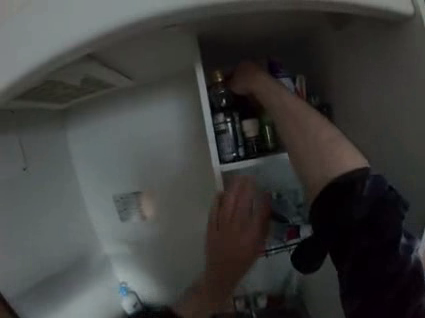

In [8]:
import json
import pickle
from decord import VideoReader, cpu
from pathlib import Path
import pandas as pd
from PIL import Image, ImageDraw

def cwh2xyxy(cx, cy, w, h, img_height, img_width):
    x1 = round((cx - w / 2) * img_width)
    y1 = round((cy - h / 2) * img_height)
    x2 = round((cx + w / 2) * img_width)
    y2 = round((cy + h / 2) * img_height)
    return x1, y1, x2, y2


# clip [T, C, H, W], bbox [t, x1, y1, x2, y2] -> GT-augmented video
#

p_data_dir = Path('egonlq/results/egonlq-gdino')
p_clip_datas = {p_clip_data.stem: p_clip_data for p_clip_data in p_data_dir.glob('*.pkl')}  # train + val

p_clip_dir = Path('/data/datasets/ego4d_data/v2/tmp-clips_320p-non_official/')
p_json = Path('jsons/nlq_train.json')
data = json.load(p_json.open())
for video in data['videos']:
    video_uid = video['video_uid']
    for clip in video['clips']:
        clip_uid = clip['clip_uid']

        p_clip_data = p_clip_datas[clip_uid]
        clip_detections = pickle.load(p_clip_data.open('rb'))
        all_objs_detected = set(sum([objs_detected for frame_bboxes, frame_scores, objs_detected in clip_detections], []))
        clip_detections_flat = []

        for annotation in clip['annotations']:
            for query in annotation['language_queries']:
                if 'slot_x' not in query:
                    continue
                obj_query = query['slot_x']
                break
            break

        for frame_number, frame_detections in enumerate(clip_detections):
            for obj_bbox, obj_score, obj_detected in zip(*frame_detections):
                relevant_objs = [obj for obj in all_objs_detected if obj in obj_detected]
                cx, cy, w, h = obj_bbox
                for relevant_obj in relevant_objs:
                    row = {
                        'obj': relevant_obj,
                        'frame_number': frame_number,
                        'obj_detected': obj_detected,
                        **{'cx': cx, 'cy': cy, 'w': w, 'h': h},
                        'score': obj_score
                    }
                    clip_detections_flat.append(row)
        df_clip_detections = pd.DataFrame.from_records(clip_detections_flat)
        df_obj = df_clip_detections[df_clip_detections['obj'].str.lower().str.contains(obj_query)]

        p_clip = p_clip_dir / f'{clip_uid}.mp4'
        vr = VideoReader(str(p_clip), ctx=cpu(0))
        frame_number = df_obj['frame_number'].iloc[0]
        frame = vr[frame_number].asnumpy()[...,::-1]
        img_height, img_width, _ = frame.shape
        xyxy = x1, y1, x2, y2 = cwh2xyxy(**df_obj[['cx', 'cy', 'w', 'h']].iloc[0], img_height=img_height, img_width=img_width)
        crop = frame[y1:y2, x1:x2]
        print(xyxy)
        print(frame_number)

        break
    break
print(all_objs_detected, obj_query)
# frame_image = Image.fromarray(frame)
# draw = ImageDraw.Draw(frame_image)
# draw.rectangle(xyxy, outline='red', width=3)
# frame_image
Image.fromarray(crop)

In [7]:
df_obj

,obj,frame_number,obj_detected,cx,cy,w,h,score
1126,meat slice,665,meat slice,0.592393,0.776238,0.230972,0.405537,0.514213
1133,meat slice,666,meat slice,0.589215,0.774471,0.237349,0.413094,0.485218
1138,meat slice,667,meat slice,0.582457,0.769594,0.249276,0.427567,0.496971
1150,meat slice,668,meat slice,0.574836,0.762764,0.255065,0.434226,0.488661
1152,meat slice,669,meat slice,0.567059,0.755765,0.263981,0.438916,0.557353
1157,meat slice,670,meat slice,0.555277,0.736151,0.261851,0.442176,0.522291
1166,meat slice,671,meat slice,0.543126,0.715997,0.262235,0.438762,0.416262
1175,meat slice,674,meat slice,0.523236,0.658719,0.225466,0.405892,0.467448
1181,meat slice,675,meat slice,0.520214,0.646152,0.217375,0.391660,0.534412
1190,meat slice,676,meat slice,0.515368,0.626226,0.198636,0.363068,0.378766


In [22]:
p_json_dir = Path('jsons/')
p_data_dir = Path('egonlq/results/egonlq-gdino')
p_clip_datas = list(p_data_dir.glob('*.pkl'))  # train + val
assert p_clip_datas

clip_annotations = {'clips': []}
for p_json_clip in p_json_dir.glob('*_clips.json'):
    clip_annotations['clips'] += json.load(p_json_clip.open())['clips']
print(len(clip_annotations['clips']))  # 1686 = 1271 + 415

# pandas로 만들기

for p_clip_data in p_clip_datas:
    clip_uid = p_clip_data.stem
    # json에서 queries: N x [start, end, slot_x(, query)] 들고 오기
    clip_detections = pickle.load(p_clip_data.open('rb'))
    queries = None
    for q in queries:
        for slot_x in slot_xs:
            if slot_x.lower() in q.lower():
                # slot_x에 해당하는 box 중 제일 큰 거 찾아서 s, e 앞뒤로 붙이기
                pass
    break


1686


[[[0.5416566133499146,
   0.46158358454704285,
   0.05734366178512573,
   0.08274935185909271],
  [0.5119495391845703,
   0.678068995475769,
   0.27147987484931946,
   0.25331538915634155],
  [0.5417394638061523,
   0.46181896328926086,
   0.05594884976744652,
   0.08140957355499268],
  [0.30076396465301514,
   0.5647745132446289,
   0.12326391041278839,
   0.15682300925254822],
  [0.5550534129142761,
   0.7422058582305908,
   0.07498987019062042,
   0.22036968171596527],
  [0.5555694699287415,
   0.7422721982002258,
   0.07151882350444794,
   0.21760377287864685]],
 [0.4971545934677124,
  0.4266586899757385,
  0.486345499753952,
  0.3699459731578827,
  0.4154777228832245,
  0.4383965730667114],
 ['pieces', 'chop rack', 'chopsticks', 'bowl', 'pieces', 'chopsticks']]